In [1]:
from 고객세분화 import data

In [2]:
df = data()

데이터 불러오기 완료
orders 수정 완료
데이터 merge 완료
RFM 값 정렬 완료
RFM 각각 계산 완료
전체 RFM_score 계산 완료
등급 나누기 완료
최종 데이터 완성


In [3]:
df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_price,Loyalty
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,3,5,9,8.0,9.46,일반 고객
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,3,5,9,8.0,3.11,일반 고객
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,3,5,9,8.0,1.72,일반 고객
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,3,5,9,8.0,3.56,일반 고객
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,3,5,9,8.0,6.83,일반 고객
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household,25247,24,2,6,21.0,7.39,충성도 높은 고객
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks,25247,24,2,6,21.0,3.16,충성도 높은 고객
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen,25247,24,2,6,21.0,12.50,충성도 높은 고객
32434487,3421083,24852,9,1,Banana,24,4,fresh fruits,produce,25247,24,2,6,21.0,4.32,충성도 높은 고객


In [4]:
df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'department',
       'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'aisle_price', 'Loyalty'],
      dtype='object')

In [5]:
df['days_since_prior_order'].max()

30.0

## 분석 목표
#### 1. 이탈 고객의 특성 분석 → 재구매 유도 전략 수립

#### 2. 최우수 고객의 소비 패턴 분석 → 충성 고객 유지 및 매출 증대

---

### 1. 이탈 고객 분석 (Churn Customers)
## (1) 충성도 높은 고객과 다른 고객의 평균 구매 주기 차이가 확연할까?

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#구매 주기(days_since_prior_order)가 점점 길어지는 패턴이 있는지 확인

loyalty_purchase_cycle = df.groupby('Loyalty')['days_since_prior_order'].mean().sort_values()
loyalty_purchase_cycle

Loyalty
충성도 높은 고객     7.664194
일반 고객        14.836568
이탈 고객        19.677964
Name: days_since_prior_order, dtype: float64

C:\Users\gfddf\AppData\Local\Temp\ipykernel_3200\2538450668.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loyalty_purchase_cycle.index, y=loyalty_purchase_cycle.values, palette="viridis")


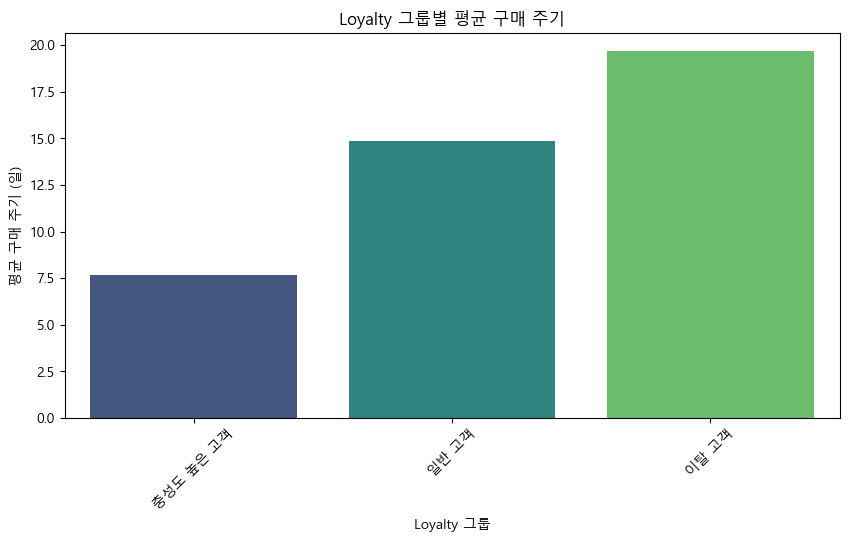

In [7]:
# 시각화
plt.rc('font',  family='Malgun Gothic')
plt.figure(figsize=(10, 5))
sns.barplot(x=loyalty_purchase_cycle.index, y=loyalty_purchase_cycle.values, palette="viridis")
plt.xlabel("Loyalty 그룹")
plt.ylabel("평균 구매 주기 (일)")
plt.title("Loyalty 그룹별 평균 구매 주기")
plt.xticks(rotation=45)
plt.show()

#확실히 이탈 고객의 주문 간격이 길군!

## (2) 충성도 높은 고객의 주문 요일 및 시간대는 어떻게 될까?

Text(0.5, 1.0, '충성도 높은 고객의 주문 요일 및 시간대')

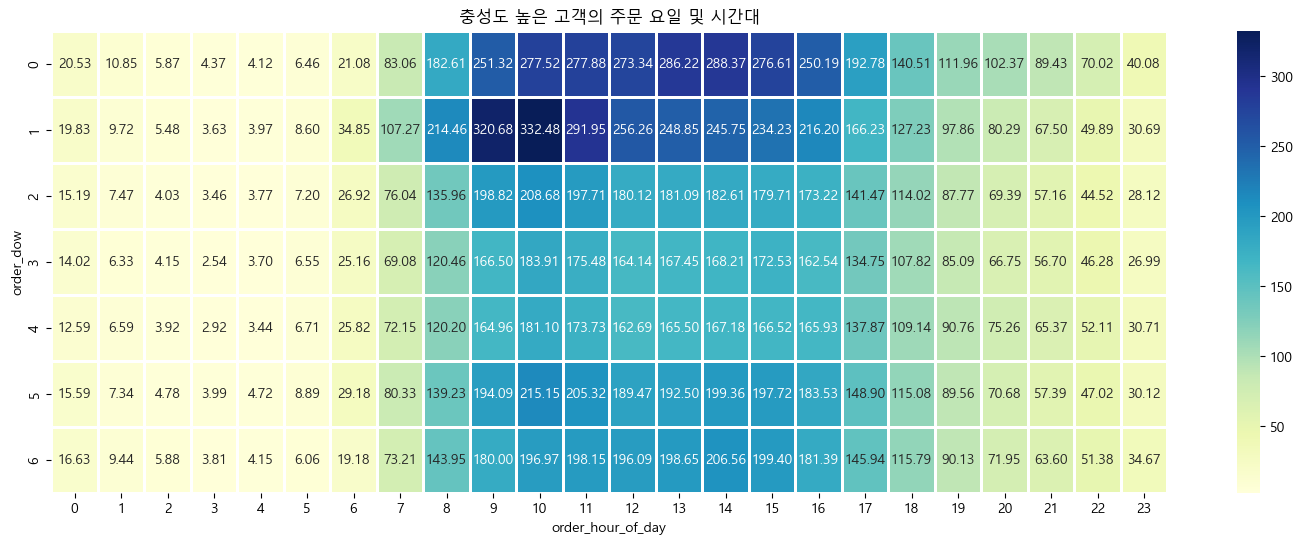

In [8]:
loyal_customers = df[df['Loyalty'] == '충성도 높은 고객']
order_dow_time = loyal_customers.pivot_table(index = 'order_dow', columns ='order_hour_of_day', values = 'order_id', aggfunc = 'count')
order_dow_time =order_dow_time*0.001

plt.figure(figsize = (18, 6))
sns.heatmap(order_dow_time, annot = True,  fmt=".2f", cmap="YlGnBu", linewidths=1)
plt.title('충성도 높은 고객의 주문 요일 및 시간대')

Text(0.5, 1.0, '일반 고객의 주문 요일 및 시간대')

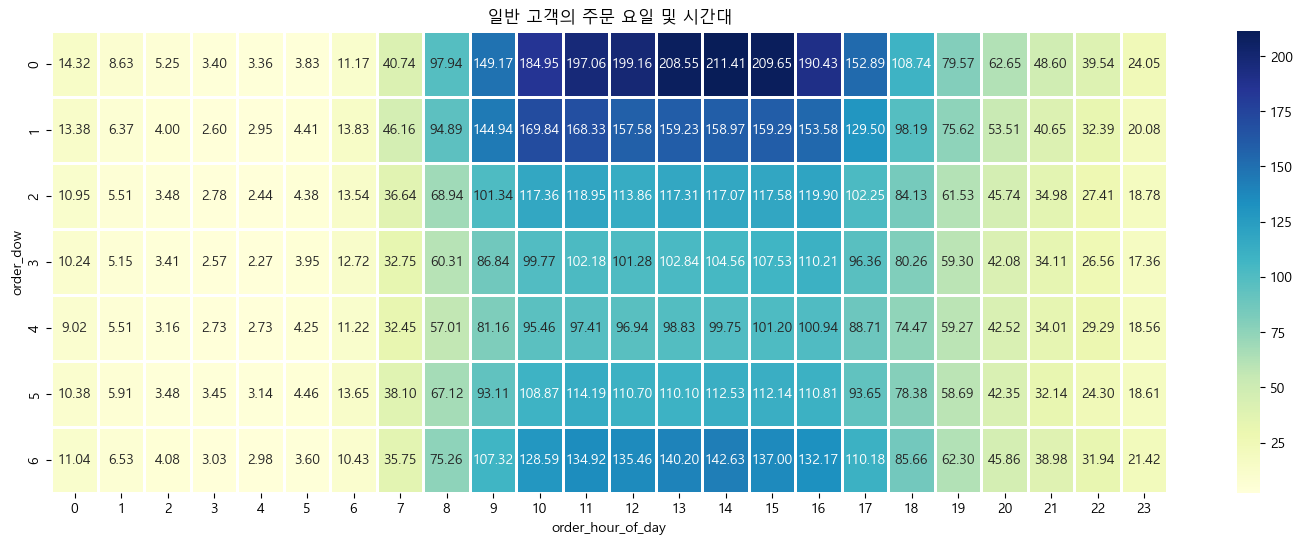

In [9]:
loyal_customers = df[df['Loyalty'] == '일반 고객']
order_dow_time = loyal_customers.pivot_table(index = 'order_dow', columns ='order_hour_of_day', values = 'order_id', aggfunc = 'count')
order_dow_time =order_dow_time*0.001

plt.figure(figsize = (18, 6))
sns.heatmap(order_dow_time, annot = True,  fmt=".2f", cmap="YlGnBu", linewidths=1)
plt.title('일반 고객의 주문 요일 및 시간대')

Text(0.5, 1.0, '이탈 고객의 주문 요일 및 시간대')

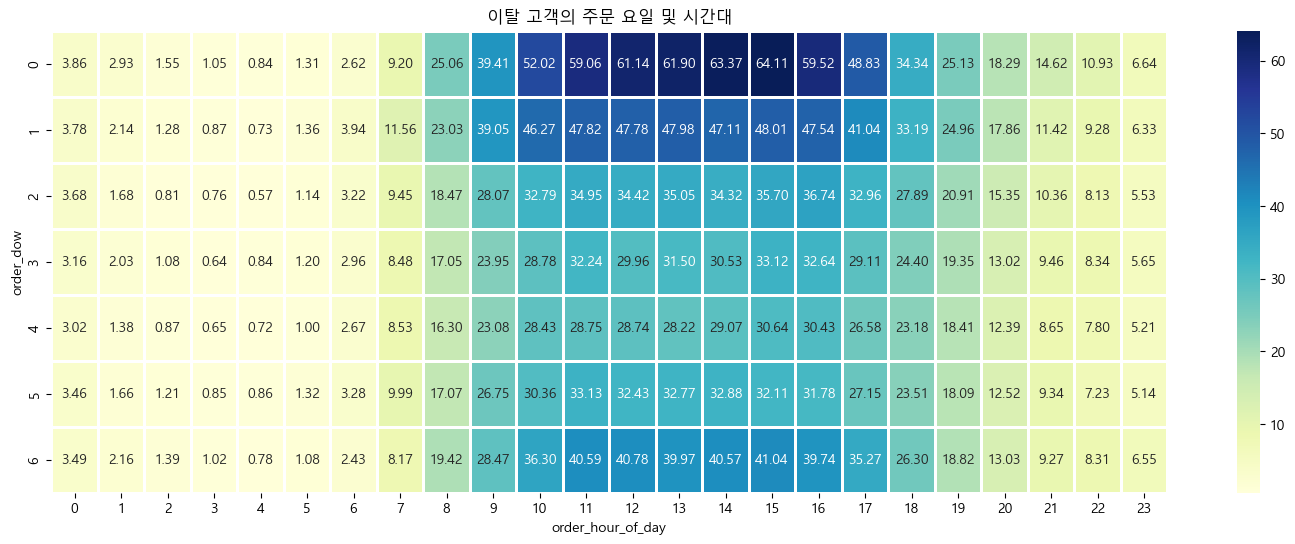

In [10]:
loyal_customers = df[df['Loyalty'] == '이탈 고객']
order_dow_time = loyal_customers.pivot_table(index = 'order_dow', columns ='order_hour_of_day', values = 'order_id', aggfunc = 'count')
order_dow_time =order_dow_time*0.001

plt.figure(figsize = (18, 6))
sns.heatmap(order_dow_time, annot = True,  fmt=".2f", cmap="YlGnBu", linewidths=1)
plt.title('이탈 고객의 주문 요일 및 시간대')

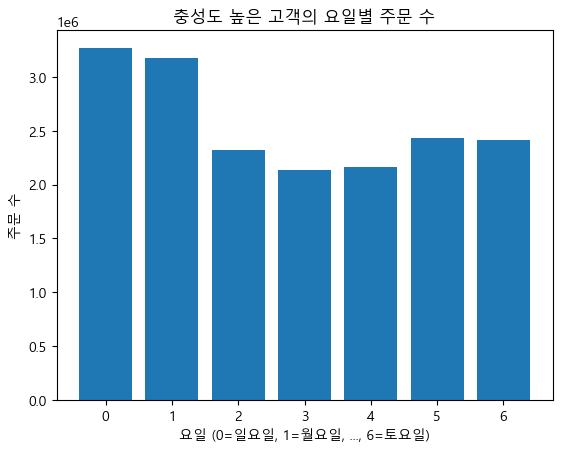

In [11]:
loyal_customers = df[df['Loyalty'] == '충성도 높은 고객']

# 요일별 주문 수 세기
order_counts = loyal_customers['order_dow'].value_counts().sort_index()

# 막대그래프 그리기
plt.bar(order_counts.index, order_counts.values)
plt.xlabel('요일 (0=일요일, 1=월요일, ..., 6=토요일)')
plt.ylabel('주문 수')
plt.title('충성도 높은 고객의 요일별 주문 수')
plt.show()

In [12]:
loyalty_purchase_cycle.reset_index()

,Loyalty,days_since_prior_order
0,충성도 높은 고객,7.664194
1,일반 고객,14.836568
2,이탈 고객,19.677964


## (3) 재구매율이 높은 제품은 무엇이 있을까?(평균 이상은 되어야 높다고 판단)

In [13]:
reordered_products = loyal_customers.groupby('department')['reordered'].mean().sort_values(ascending=False)
reordered_products = reordered_products.reset_index()
reordered_products

,department,reordered
0,dairy eggs,0.776570
1,produce,0.756810
2,beverages,0.753681
3,bakery,0.737869
4,pets,0.718002
5,deli,0.716640
6,alcohol,0.699558
7,meat seafood,0.683638
8,snacks,0.676117
9,breakfast,0.673324


In [14]:
avg_reordered_products = reordered_products['reordered'].mean()
reordered_products = reordered_products[reordered_products['reordered'] >= avg_reordered_products]
reordered_products

,department,reordered
0,dairy eggs,0.776570
1,produce,0.756810
2,beverages,0.753681
3,bakery,0.737869
4,pets,0.718002
5,deli,0.716640
6,alcohol,0.699558
7,meat seafood,0.683638
8,snacks,0.676117
9,breakfast,0.673324


In [15]:
hight_reordered_product_name = reordered_products['department'].tolist()
hight_reordered_product_name

['dairy eggs',
 'produce',
 'beverages',
 'bakery',
 'pets',
 'deli',
 'alcohol',
 'meat seafood',
 'snacks',
 'breakfast',
 'bulk',
 'babies',
 'frozen']

In [16]:
hight_reordered_info = loyal_customers[loyal_customers['department'].isin(hight_reordered_product_name)]
hight_reordered_info

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_price,Loyalty
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs,205970,16,5,17,12.0,5.08,충성도 높은 고객
10,3,24838,2,1,Unsweetened Almondmilk,91,16,soy lactosefree,dairy eggs,205970,16,5,17,12.0,6.85,충성도 높은 고객
11,3,17704,3,1,Lemons,123,4,packaged vegetables fruits,produce,205970,16,5,17,12.0,3.94,충성도 높은 고객
12,3,21903,4,1,Organic Baby Spinach,123,4,packaged vegetables fruits,produce,205970,16,5,17,12.0,3.94,충성도 높은 고객
13,3,17668,5,1,Unsweetened Chocolate Almond Breeze Almond Milk,91,16,soy lactosefree,dairy eggs,205970,16,5,17,12.0,6.85,충성도 높은 고객
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434483,3421083,35211,5,0,Organic Strawberry & Mango Dried Tiny Fruits,92,18,baby food formula,babies,25247,24,2,6,21.0,10.06,충성도 높은 고객
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks,25247,24,2,6,21.0,3.16,충성도 높은 고객
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen,25247,24,2,6,21.0,12.50,충성도 높은 고객
32434487,3421083,24852,9,1,Banana,24,4,fresh fruits,produce,25247,24,2,6,21.0,4.32,충성도 높은 고객


## (4) 재구매율이 다른 세그먼트와 큰 차이가 있을까?

In [17]:
loyalty_repurchase = df.groupby('Loyalty')['reordered'].mean().sort_values()
loyalty_repurchase

Loyalty
이탈 고객        0.287677
일반 고객        0.502617
충성도 높은 고객    0.700283
Name: reordered, dtype: float64

C:\Users\gfddf\AppData\Local\Temp\ipykernel_3200\4258772440.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loyalty_repurchase.index, y=loyalty_repurchase.values, palette="viridis")


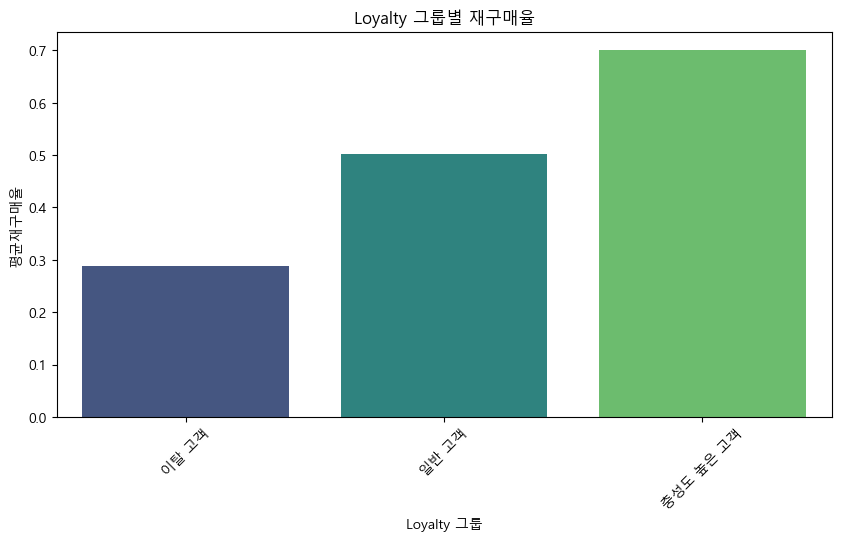

In [18]:
plt.rc('font',  family='Malgun Gothic')
plt.figure(figsize=(10, 5))
sns.barplot(x=loyalty_repurchase.index, y=loyalty_repurchase.values, palette="viridis")
plt.xlabel("Loyalty 그룹")
plt.ylabel("평균재구매율")
plt.title("Loyalty 그룹별 재구매율")
plt.xticks(rotation=45)
plt.show()

## (5) 충성도 높은 고객이 장바구니에 첫번째로 넣는 제품들의 가격은 다른 세그먼트보다 높을까 낮을까?

In [19]:
# 충성도 높은 고객 필터링
loyal_customers = df[df['Loyalty'] == '충성도 높은 고객']

# 장바구니에 첫 번째로 추가한 제품 찾기
first_cart_products = loyal_customers[loyal_customers['add_to_cart_order'] == 1]
first_cart_products

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_price,Loyalty
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs,205970,16,5,17,12.0,5.08,충성도 높은 고객
17,4,46842,1,0,Plain Pre-Sliced Bagels,93,3,breakfast bakery,bakery,178520,36,1,9,7.0,3.62,충성도 높은 고객
30,5,13176,1,1,Bag of Organic Bananas,24,4,fresh fruits,produce,156122,42,6,16,9.0,4.32,충성도 높은 고객
62,9,21405,1,0,"Organic Red Radish, Bunch",83,4,fresh vegetables,produce,139016,14,0,19,5.0,3.11,충성도 높은 고객
77,10,24852,1,1,Banana,24,4,fresh fruits,produce,135442,4,6,8,8.0,4.32,충성도 높은 고객
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434434,3421076,48101,1,0,Poultry Magic Seasoning Blends,104,13,spices seasonings,pantry,193225,18,5,13,4.0,1.72,충성도 높은 고객
32434442,3421077,27966,1,0,Organic Raspberries,123,4,packaged vegetables fruits,produce,107102,1,3,10,NaN,3.94,충성도 높은 고객
32434456,3421080,27845,1,1,Organic Whole Milk,84,16,milk,dairy eggs,52726,2,1,11,2.0,4.15,충성도 높은 고객
32434472,3421082,17279,1,1,Fresh 99% Lean Ground Turkey,49,12,packaged poultry,meat seafood,175185,23,2,18,4.0,10.44,충성도 높은 고객


충성도 높은 고객의 첫 번째 장바구니 제품 평균 가격: 6.33


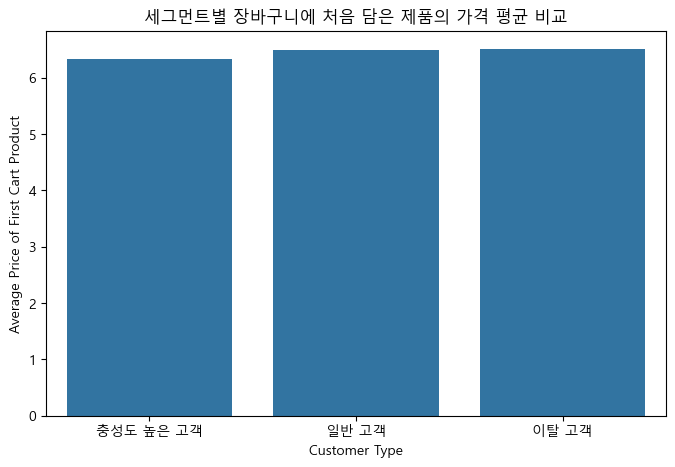

In [20]:
# 충성도 높은 고객의 평균 첫 번째 장바구니 제품 가격
loyal_avg_price = first_cart_products['aisle_price'].mean()
print(f"충성도 높은 고객의 첫 번째 장바구니 제품 평균 가격: {loyal_avg_price:.2f}")

# 비교를 위해 이탈 고객과 일반 고객도 분석
churn_customers = df[df['Loyalty'] == '이탈 고객']
churn_first_cart_products = churn_customers[churn_customers['add_to_cart_order'] == 1]
churn_avg_price = churn_first_cart_products['aisle_price'].mean()

general_customers = df[df['Loyalty'] == '일반 고객']
general_first_cart_products = general_customers[general_customers['add_to_cart_order'] == 1]
general_avg_price = general_first_cart_products['aisle_price'].mean()

# 그룹별 첫 번째 장바구니 제품 평균 가격 비교
df_price_comparison = pd.DataFrame({
    "Customer Type": ["충성도 높은 고객", "일반 고객", "이탈 고객"],
    "Avg First Cart Product Price": [loyal_avg_price, general_avg_price, churn_avg_price]
})

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=df_price_comparison, x="Customer Type", y="Avg First Cart Product Price")
plt.xlabel("Customer Type")
plt.ylabel("Average Price of First Cart Product")
plt.title("세그먼트별 장바구니에 처음 담은 제품의 가격 평균 비교")
plt.show()

## (6) 충성도 높은 고객이 한 번에 제일 많이 제품을 살까? 가격도 가장 많을까?

In [21]:
# 충성 고객 필터링
loyal_customers = df[df['Loyalty'] == '충성도 높은 고객']

# 충성 고객의 주문별 제품 수 계산
loyal_order_sizes = loyal_customers.groupby('order_id')['product_name'].count().mean()
loyal_order_sizes

10.320251893871728

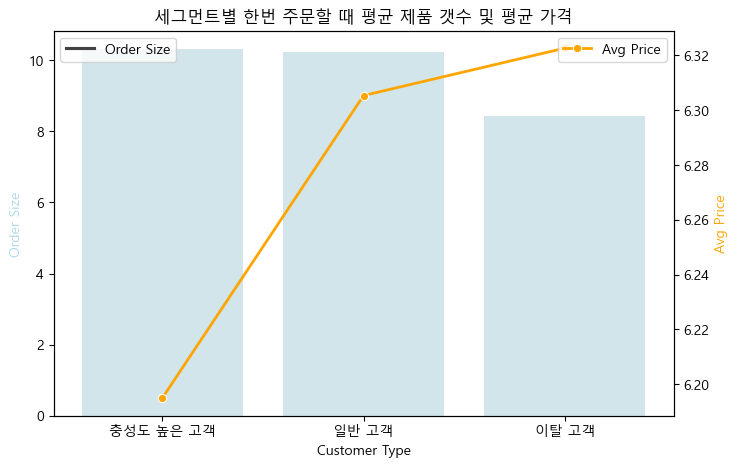

In [22]:
# 충성 고객 필터링
loyal_customers = df[df['Loyalty'] == '충성도 높은 고객']

# 충성 고객의 주문별 제품 수 계산
loyal_order_sizes = loyal_customers.groupby('order_id')['product_name'].count().mean()
loyal_avg_price = loyal_customers.groupby('order_id')['aisle_price'].mean().mean()
loyal_order_sizes

# 일반 고객의 주문별 제품 수 계산
normal_customers = df[df['Loyalty'] == '일반 고객']
normal_order_sizes = normal_customers.groupby('order_id')['product_name'].count().mean()
normal_avg_price = normal_customers.groupby('order_id')['aisle_price'].mean().mean()

# 이탈 고객의 주문별 제품 수 계산
churn_customers = df[df['Loyalty'] == '이탈 고객']
churn_order_sizes = churn_customers.groupby('order_id')['product_name'].count().mean()
churn_avg_price = churn_customers.groupby('order_id')['aisle_price'].mean().mean()

df_size_comparison = pd.DataFrame({
    "Customer Type": ["충성도 높은 고객", "일반 고객", "이탈 고객"],
    "Once Order Size": [loyal_order_sizes, normal_order_sizes, churn_order_sizes]
})

df_price_comparison = pd.DataFrame({
    "Customer Type": ["충성도 높은 고객", "일반 고객", "이탈 고객"],
    "Avg Price": [loyal_avg_price, normal_avg_price, churn_avg_price]
})
    
# 시각화

fig, ax1 = plt.subplots(figsize=(8, 5))

# 첫 번째 y축: 주문당 제품 수 (바 차트)
sns.barplot(data=df_size_comparison, x="Customer Type", y="Once Order Size", color='lightblue', alpha=0.6, ax=ax1)

# 두 번째 y축: 평균 가격 (선 차트)
ax2 = ax1.twinx()
sns.lineplot(data=df_price_comparison, x="Customer Type", y="Avg Price", color='orange', marker="o", linewidth=2, ax=ax2)

# 제목 설정
ax1.set_title("세그먼트별 한번 주문할 때 평균 제품 갯수 및 평균 가격")
ax1.set_xlabel("Customer Type")
ax1.set_ylabel("Order Size", color='lightblue')
ax2.set_ylabel("Avg Price", color='orange')

# 레전드 추가
ax1.legend(["Order Size"], loc="upper left")
ax2.legend(["Avg Price"], loc="upper right")

plt.show()


## (6) 충성도 높은 고객이 전체 매출의 몇프로를 담당할까?

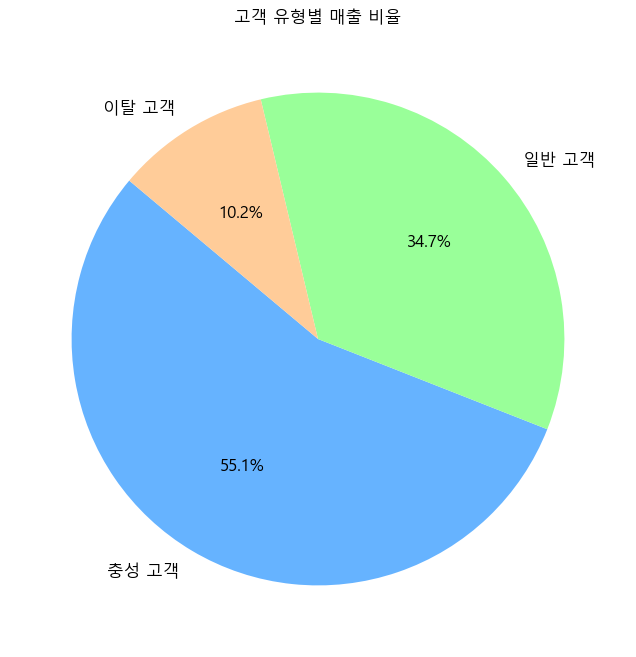

In [23]:
import matplotlib.pyplot as plt

# 충성 고객, 일반 고객, 이탈 고객 각각 필터링
loyal_customers = df[df['Loyalty'] == '충성도 높은 고객']
normal_customers = df[df['Loyalty'] == '일반 고객']
churn_customers = df[df['Loyalty'] == '이탈 고객']

# 각각 매출 계산
loyal_revenue = loyal_customers['aisle_price'].sum()
normal_revenue = normal_customers['aisle_price'].sum()
churn_revenue = churn_customers['aisle_price'].sum()

# 전체 매출 계산
total_revenue = df['aisle_price'].sum()

# 비율 계산
loyal_percentage = (loyal_revenue / total_revenue) * 100
normal_percentage = (normal_revenue / total_revenue) * 100
churn_percentage = (churn_revenue / total_revenue) * 100

# 파이 차트 시각화
labels = ['충성 고객', '일반 고객', '이탈 고객']
sizes = [loyal_percentage, normal_percentage, churn_percentage]
colors = ['#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 12})
plt.title('고객 유형별 매출 비율')
plt.show()

## (7) 충성도 높은 고객이 마지막으로 구매한 제품 분석

C:\Users\gfddf\AppData\Local\Temp\ipykernel_3200\3665420810.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_products.index, y=top_20_products.values, palette='viridis')


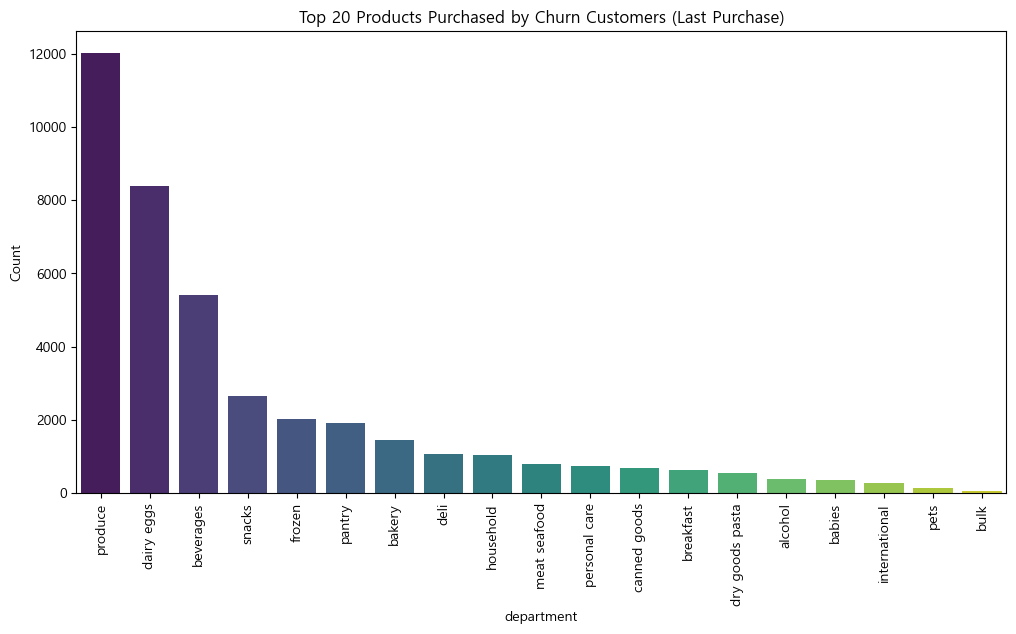

In [24]:
# 이탈 고객의 마지막 주문만 필터링
churn_last_orders = df[df['Loyalty'] == '충성도 높은 고객']
churn_last_orders = churn_last_orders.loc[churn_last_orders.groupby('user_id')['order_number'].idxmax()]
churn_last_orders['department'].value_counts()

#시각화
product_counts = churn_last_orders['department'].value_counts()

# 상위 20개 제품만 시각화 (너무 많은 제품을 그리면 보기 어려울 수 있으므로)
top_20_products = product_counts

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_products.index, y=top_20_products.values, palette='viridis')
plt.xticks(rotation=90)  # x축 레이블이 겹치지 않도록 90도 회전
plt.xlabel('department')
plt.ylabel('Count')
plt.title('Top 20 Products Purchased by Churn Customers (Last Purchase)')
plt.show()

In [25]:
# 마지막 주문 중 재구매율 높은 제품 필터링
reordered_products = churn_last_orders.groupby('department')['reordered'].mean().sort_values(ascending=False)
reordered_products

# 필터링 조건은 재구매율 평균 이상
avg_reordered_products = reordered_products.mean()

filter_reordered_last_prodcuct = reordered_products[reordered_products >=  avg_reordered_products]
filter_reordered_last_prodcuct = filter_reordered_last_prodcuct.reset_index()

filter_reordered_last_prodcuct

#5412 rows × 2 columns

,department,reordered
0,dairy eggs,0.910369
1,produce,0.905360
2,beverages,0.889033
3,pets,0.876712
4,bakery,0.861856
5,alcohol,0.856771
6,deli,0.832090
7,snacks,0.817013
8,frozen,0.800689
9,breakfast,0.777429


In [26]:
# 새로운 조건 추가
# 마지막 주문 중 재구매율이 평균이상인 것중 주문빈도가 높은 제품

product_users = churn_last_orders.groupby('department')['user_id'].nunique().sort_values(ascending = False)
product_users = product_users.reset_index().rename(columns = {'user_id' : 'user_count'})
product_users

,department,user_count
0,produce,12014
1,dairy eggs,8390
2,beverages,5398
3,snacks,2645
4,frozen,2032
5,pantry,1904
6,bakery,1455
7,deli,1072
8,household,1035
9,meat seafood,808


In [27]:
# 평균 구매갯수로 필터링
avg_product_users = product_users['user_count'].mean()
avg_reordered_products = filter_reordered_last_prodcuct['reordered'].mean()

filter_reordered_last_product = filter_reordered_last_prodcuct.merge(product_users, on='department', how = 'left')
filter_reordered_last_product

,department,reordered,user_count
0,dairy eggs,0.910369,8390
1,produce,0.905360,12014
2,beverages,0.889033,5398
3,pets,0.876712,146
4,bakery,0.861856,1455
5,alcohol,0.856771,384
6,deli,0.832090,1072
7,snacks,0.817013,2645
8,frozen,0.800689,2032
9,breakfast,0.777429,638


In [28]:
filter_reordered_last_product = filter_reordered_last_product[(filter_reordered_last_product['reordered']>=avg_reordered_products) & (filter_reordered_last_product['user_count'] >= avg_product_users)].sort_values(by = ['reordered', 'user_count'], ascending = [False, False])
filter_reordered_last_product

,department,reordered,user_count
0,dairy eggs,0.910369,8390
1,produce,0.905360,12014
2,beverages,0.889033,5398


In [29]:
# 이탈 고객이 마지막으로 주문한 제품 중 재구매율과 주문반도가 높은 제품 이름들
target_product_name = filter_reordered_last_product['department'].tolist()
target_product_name

['dairy eggs', 'produce', 'beverages']

In [30]:
# # 해당 제품을 구매한 고객 추출
churn_customers_high_reordered = churn_last_orders[churn_last_orders['department'].isin(target_product_name)]

# # 해당 제품을 구매한 고객들의 user_id 목록 추출
target_user_ids = churn_customers_high_reordered['user_id'].unique()

# # target_user_ids는 이메일 발송 대상
target_user_ids = list(target_user_ids)
target_user_ids

[17,
 27,
 28,
 31,
 50,
 63,
 67,
 87,
 112,
 132,
 142,
 146,
 150,
 154,
 174,
 182,
 195,
 204,
 210,
 219,
 227,
 232,
 233,
 243,
 248,
 258,
 262,
 264,
 278,
 280,
 281,
 289,
 300,
 304,
 307,
 310,
 313,
 321,
 323,
 327,
 370,
 373,
 382,
 398,
 403,
 409,
 413,
 423,
 429,
 444,
 452,
 454,
 462,
 464,
 465,
 466,
 475,
 487,
 496,
 503,
 516,
 520,
 529,
 531,
 535,
 538,
 560,
 583,
 596,
 604,
 606,
 612,
 616,
 618,
 630,
 641,
 645,
 646,
 649,
 655,
 657,
 658,
 684,
 688,
 690,
 699,
 719,
 729,
 732,
 741,
 762,
 767,
 768,
 778,
 787,
 812,
 818,
 845,
 847,
 848,
 849,
 854,
 857,
 868,
 870,
 879,
 880,
 894,
 896,
 907,
 911,
 913,
 914,
 932,
 947,
 958,
 962,
 963,
 964,
 968,
 972,
 975,
 980,
 995,
 998,
 999,
 1004,
 1018,
 1022,
 1023,
 1024,
 1036,
 1044,
 1050,
 1058,
 1059,
 1084,
 1107,
 1109,
 1120,
 1130,
 1136,
 1139,
 1141,
 1142,
 1150,
 1162,
 1164,
 1171,
 1173,
 1191,
 1213,
 1216,
 1219,
 1237,
 1238,
 1240,
 1250,
 1264,
 1267,
 1271,
 1280,


## (8) 이탈 고객이 주로 구매하는 카테고리 (aisle) 분석

In [31]:
## (3) 이탈 고객이 주로 구매하는 카테고리 (aisle, department) 분석
# 이탈 고객의 구매 카테고리 분석# 특정 카테고리에서 이탈률이 높다면, 이 제품들에 대한 가격 조정, 번들링, 프로모션을 고려 가능

churn_customers = df[df['Loyalty'] == '이탈 고객']

# 전체 고객이 구매한 aisle별 고객 수
total_aisle_users = df.groupby('department')['user_id'].nunique().reset_index()
total_aisle_users.columns = ['department', 'total_users']

# 이탈 고객이 구매한 aisle별 고객 수
churn_aisle_users = churn_customers.groupby('department')['user_id'].nunique().reset_index()
churn_aisle_users.columns = ['department', 'churn_users']

# 이탈률 계산 (churn_users / total_users)
aisle_churn_rate = churn_aisle_users.merge(total_aisle_users, on='department', how='left')
aisle_churn_rate['churn_rate'] = aisle_churn_rate['churn_users'] / aisle_churn_rate['total_users']
aisle_churn_rate

,department,churn_users,total_users,churn_rate
0,alcohol,5303,15798,0.335675
1,babies,6708,33730,0.198873
2,bakery,42926,140612,0.305280
3,beverages,59551,172795,0.344634
4,breakfast,30835,114169,0.270082
5,bulk,1916,12484,0.153476
6,canned goods,40354,133733,0.301751
7,dairy eggs,70979,190565,0.372466
8,deli,39464,133865,0.294804
9,dry goods pasta,36091,124820,0.289144


In [32]:
# 이탈 고객만을 대상으로 구매빈도 계산
aisle_purchase_freq = churn_customers.groupby('department')['order_id'].nunique().reset_index()
aisle_purchase_freq.columns = ['department', 'purchase_frequency']

# 필터링 조건은 평균 이상
avg_churn_rate = aisle_churn_rate['churn_rate'].mean()
avg_purchase_freq = aisle_purchase_freq['purchase_frequency'].mean()

# 이탈률이 평균 이상이고, 구매빈도가 평균 이상인 aisle을 필터링
filtered_aisles = aisle_churn_rate[(aisle_churn_rate['churn_rate'] >= avg_churn_rate) & 
                                    (aisle_purchase_freq['purchase_frequency'] >= avg_purchase_freq)]


# 결과
filtered_aisles = filtered_aisles.sort_values(by='churn_rate', ascending=False)
filtered_aisles = filtered_aisles.reset_index()
filtered_aisles = filtered_aisles.drop('index', axis = 1)
filtered_aisles

# 이탈 고객의 구매 카테고리 분석# 특정 카테고리에서 이탈률이 높다면, 이 제품들에 대한 가격 조정, 번들링, 프로모션을 고려 가능
# 아래 39개의 aisle에만 프로모션 적용

,department,churn_users,total_users,churn_rate
0,produce,73492,193237,0.380321
1,dairy eggs,70979,190565,0.372466
2,beverages,59551,172795,0.344634
3,snacks,59235,174219,0.340003
4,pantry,58133,172755,0.336505
5,frozen,54639,163233,0.334730
6,bakery,42926,140612,0.305280


## 2. 충성 고객의 구매시간대(9~16시)와 요일(일,월)이 일반 고객 및 이탈 고객과 비슷함
### 💡 인사이트:
    구매 타이밍이 일반 고객과 크게 다르지 않다면, Instacart의 전체적인 서비스 이용 패턴일 가능성이 큼.
    하지만 월요일 주문량이 가장 많다면 주말 소비 후 냉장고를 채우려는 성향일 수 있음.
    **월요일 오전 프로모션(예: 무료 배송, 할인 이벤트)**을 진행하면 효과적일 수 있음.
### 📊 추가 EDA 방향:
    시간대별 매출 기여도 분석 (단순 주문량이 아니라 실제 매출 기준으로)
    월요일에 많이 사는 제품 카테고리 분석 (주말 소비 후 채우는 품목인지 확인)
    일반 고객과 충성 고객 간 구매 품목 차이 비교


Text(0.5, 1.0, '충성도 높은 고객의 요일 및 시간대별 매출액')

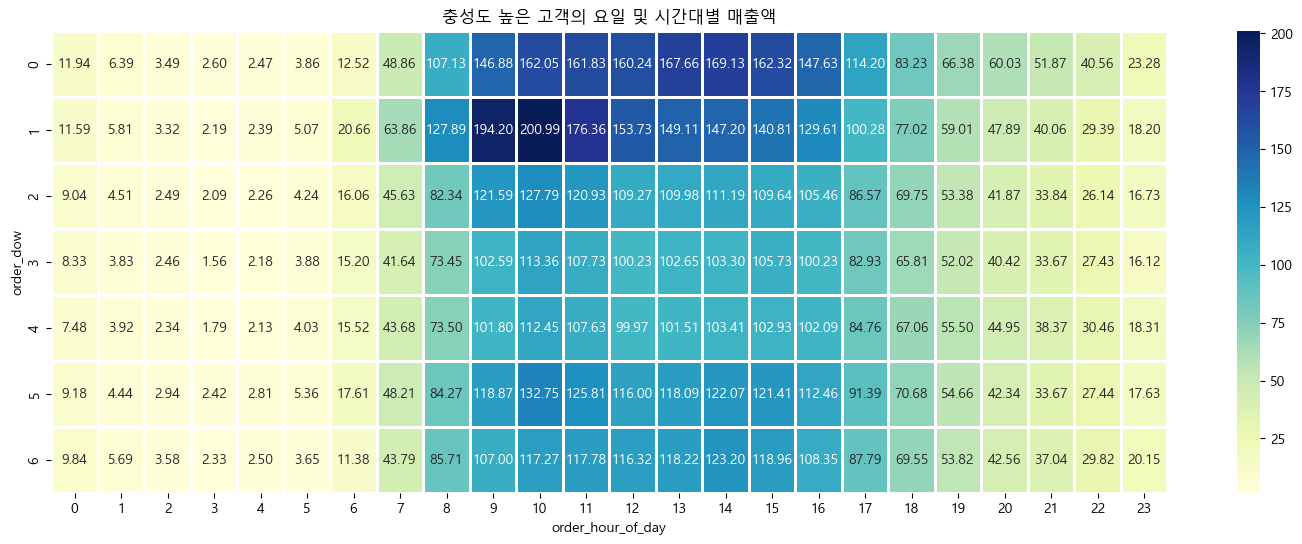

In [33]:
import pandas as pd

order_dow_time = loyal_customers.pivot_table(index = 'order_dow', columns ='order_hour_of_day', values = 'aisle_price', aggfunc = 'sum')
order_dow_time =order_dow_time*0.0001
plt.figure(figsize = (18, 6))
sns.heatmap(order_dow_time, annot = True,  fmt=".2f", cmap="YlGnBu", linewidths=1)
plt.title('충성도 높은 고객의 요일 및 시간대별 매출액')

## 주문량 뿐만 아니라 매출액도 확시히 월요일 10시가 가장 핫한 것을 확인할 수 있음

C:\Users\gfddf\AppData\Local\Temp\ipykernel_3200\1599087540.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(monday_data["department"], rotation=90)


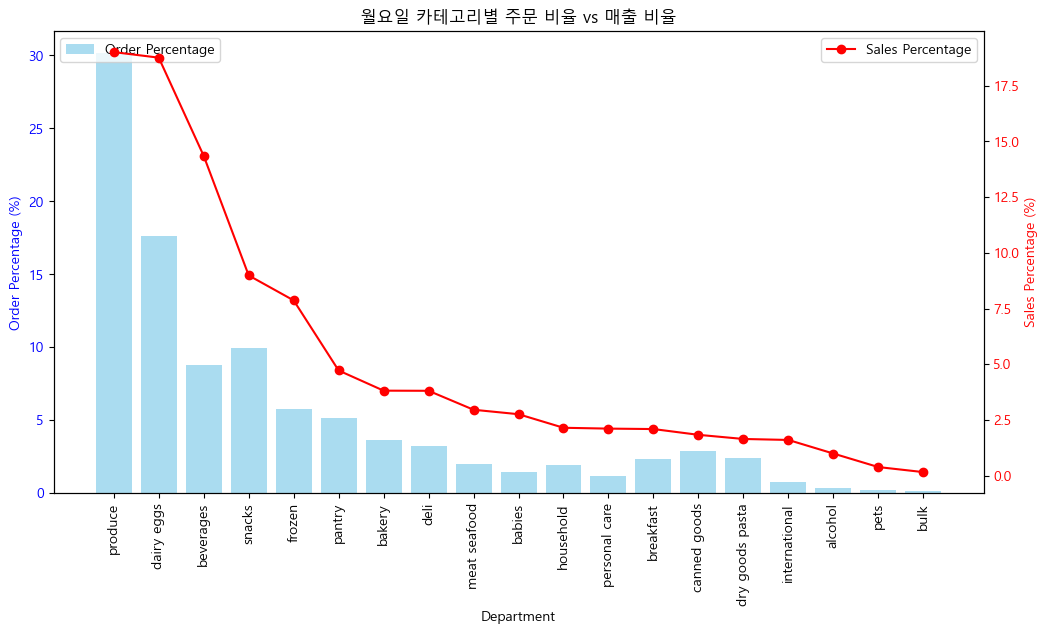

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# 월요일 주문 데이터 필터링
monday_orders = loyal_customers[loyal_customers["order_dow"] == 1]

# 카테고리별 구매 횟수 집계
monday_category_counts = monday_orders["department"].value_counts().reset_index()
monday_category_counts.columns = ["department", "order_count"]

# 전체 주문 대비 카테고리별 비율 계산
total_monday_orders = monday_category_counts["order_count"].sum()
monday_category_counts["percentage"] = (monday_category_counts["order_count"] / total_monday_orders) * 100

# 월요일 카테고리별 매출 데이터 집계
monday_category_sales = monday_orders.groupby("department")["aisle_price"].sum().reset_index()
monday_category_sales.columns = ["department", "total_sales"]

# 전체 매출액 계산 및 비율 변환
total_monday_sales = monday_category_sales["total_sales"].sum()
monday_category_sales["percentage"] = (monday_category_sales["total_sales"] / total_monday_sales) * 100

# 데이터 병합 (카테고리 기준)
monday_data = monday_category_counts.merge(monday_category_sales, on="department")
monday_data = monday_data.sort_values(by="percentage_y", ascending=False)  # 매출 비율 기준 정렬

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 막대 그래프로 주문 비율 시각화
ax1.bar(monday_data["department"], monday_data["percentage_x"], color='skyblue', alpha=0.7, label="Order Percentage")
ax1.set_xlabel("Department")
ax1.set_ylabel("Order Percentage (%)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(monday_data["department"], rotation=90)
ax1.legend(loc="upper left")

# 선 그래프로 매출 비율 시각화
twin_ax = ax1.twinx()
twin_ax.plot(monday_data["department"], monday_data["percentage_y"], color='red', marker='o', label="Sales Percentage")
twin_ax.set_ylabel("Sales Percentage (%)", color='red')
twin_ax.tick_params(axis='y', labelcolor='red')
twin_ax.legend(loc="upper right")

plt.title("월요일 카테고리별 주문 비율 vs 매출 비율")
plt.show()

In [35]:
monday_category_sales.sort_values(by='percentage', ascending = False)

,department,total_sales,percentage
17,produce,3624517.52,19.010060
7,dairy eggs,3576842.32,18.760011
3,beverages,2736021.77,14.350031
18,snacks,1713235.03,8.985665
10,frozen,1499724.35,7.865833
14,pantry,899831.34,4.719483
2,bakery,727304.16,3.814603
8,deli,726131.24,3.808451
13,meat seafood,563951.77,2.957844
1,babies,525782.35,2.757651


In [36]:
monday_category_counts.sort_values(by='percentage', ascending = False)

,department,order_count,percentage
0,produce,957247,30.160141
1,dairy eggs,560210,17.650630
2,snacks,316023,9.956990
3,beverages,278921,8.788011
4,frozen,183890,5.793853
5,pantry,163183,5.141434
6,bakery,116598,3.673673
7,deli,101986,3.213290
8,canned goods,91117,2.870839
9,dry goods pasta,75566,2.380871


In [37]:
# Produce & Dairy Eggs 카테고리 제품이 포함된 주문 찾기
target_orders_p = loyal_customers[loyal_customers['department'].isin(['produce'])]['order_id'].unique()
target_orders_d = loyal_customers[loyal_customers['department'].isin(['dairy eggs'])]['order_id'].unique()

# 해당 주문에서 함께 구매된 제품 필터링
basket_analysis_p = loyal_customers[loyal_customers['order_id'].isin(target_orders_p)]
basket_analysis_d = loyal_customers[loyal_customers['order_id'].isin(target_orders_d)]

# Produce & Dairy Eggs 제외한 동반 구매 제품들 확인
co_purchased_products_p = basket_analysis_p[~basket_analysis_p['department'].isin(['produce'])]
co_purchased_products_d = basket_analysis_d[~basket_analysis_d['department'].isin(['dairy eggs'])]

# 제품별 동반 구매 횟수 계산
co_purchased_counts_p = co_purchased_products_p['department'].value_counts().reset_index()
co_purchased_counts_d = co_purchased_products_d['department'].value_counts().reset_index()

# 상위 10개 제품 출력
print("🔹 충성 고객이 신선식품과 함께 가장 많이 구매하는 제품 🔹")
print(co_purchased_counts_p.head(10))
print("🔹 충성 고객이 유제품과 함께 가장 많이 구매하는 제품 🔹")
print(co_purchased_counts_d.head(10))


🔹 충성 고객이 신선식품과 함께 가장 많이 구매하는 제품 🔹
        department    count
0       dairy eggs  2674268
1           snacks  1313538
2        beverages  1110993
3           frozen   952994
4           pantry   849368
5           bakery   563036
6             deli   504929
7     canned goods   491698
8  dry goods pasta   396469
9     meat seafood   335053
🔹 충성 고객이 유제품과 함께 가장 많이 구매하는 제품 🔹
        department    count
0          produce  4335091
1           snacks  1287184
2        beverages  1100311
3           frozen   918429
4           pantry   804114
5           bakery   556380
6             deli   476773
7     canned goods   451206
8  dry goods pasta   378768
9        breakfast   330354


C:\Users\gfddf\AppData\Local\Temp\ipykernel_3200\1361421222.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=add_first_department.values, y=add_first_department.index, palette='viridis')


Text(0.5, 1.0, '충성고객 월요일 장바구니 첫 제품')

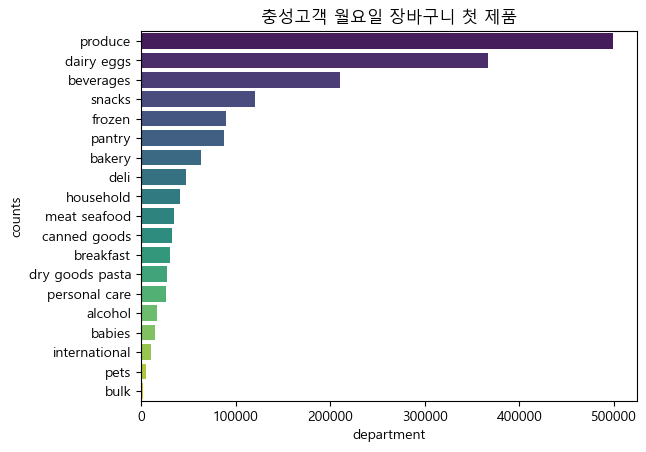

In [38]:
add_first = loyal_customers[loyal_customers['add_to_cart_order']==1]
add_first_department = add_first['department'].value_counts()
add_first_department

sns.barplot(x=add_first_department.values, y=add_first_department.index, palette='viridis')
plt.xlabel('department')
plt.ylabel('counts')
plt.title('충성고객 월요일 장바구니 첫 제품')

평균 상품 수량: 10.32
중앙 상품 수량: 8.00
평균 주문 금액: 62.16
중앙 주문 금액: 50.69


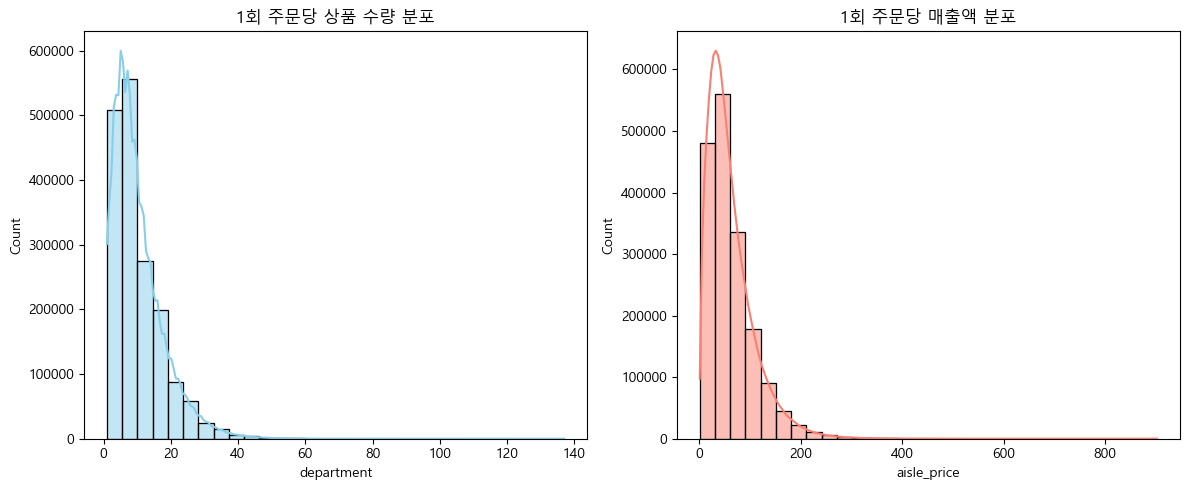

In [52]:
# 충성고객만
loyalty_orders = df[df['Loyalty'] == '충성도 높은 고객']

# 주문별 상품 개수
order_item_counts = loyalty_orders.groupby('order_id')['department'].count()

# 주문별 매출 (aisle_price 합산)
order_revenue = loyalty_orders.groupby('order_id')['aisle_price'].sum()

# 평균/중앙값 출력
print(f'평균 상품 수량: {order_item_counts.mean():.2f}')
print(f'중앙 상품 수량: {order_item_counts.median():.2f}')
print(f'평균 주문 금액: {order_revenue.mean():.2f}')
print(f'중앙 주문 금액: {order_revenue.median():.2f}')

# 히스토그램
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(order_item_counts, bins=30, kde=True, color='skyblue')
plt.title('1회 주문당 상품 수량 분포')

plt.subplot(1,2,2)
sns.histplot(order_revenue, bins=30, kde=True, color='salmon')
plt.title('1회 주문당 매출액 분포')

plt.tight_layout()
plt.show()

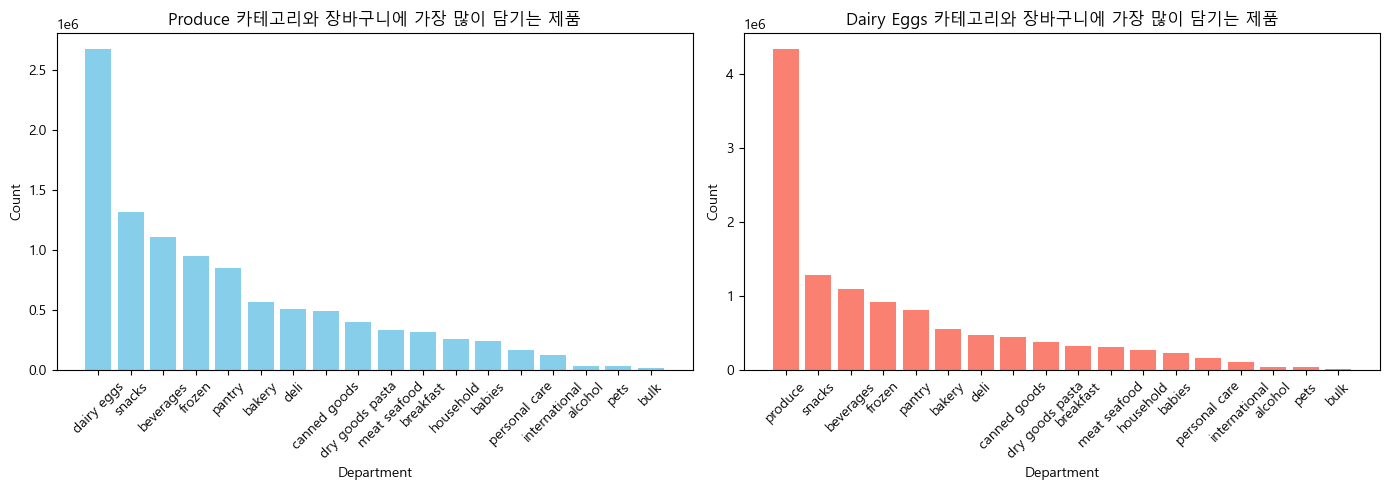

In [39]:
# 그래프 크기 설정
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Produce 카테고리와 함께 장바구니에 많이 담기는 제품 (첫 번째 그래프)
ax[0].bar(x=co_purchased_counts_p['department'], height=co_purchased_counts_p['count'], color='skyblue')
ax[0].set_title('Produce 카테고리와 장바구니에 가장 많이 담기는 제품')
ax[0].set_xlabel('Department')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=45)

# Dairy Eggs 카테고리와 함께 장바구니에 많이 담기는 제품 (두 번째 그래프)
ax[1].bar(x=co_purchased_counts_d['department'], height=co_purchased_counts_d['count'], color='salmon')
ax[1].set_title('Dairy Eggs 카테고리와 장바구니에 가장 많이 담기는 제품')
ax[1].set_xlabel('Department')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=45)

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()

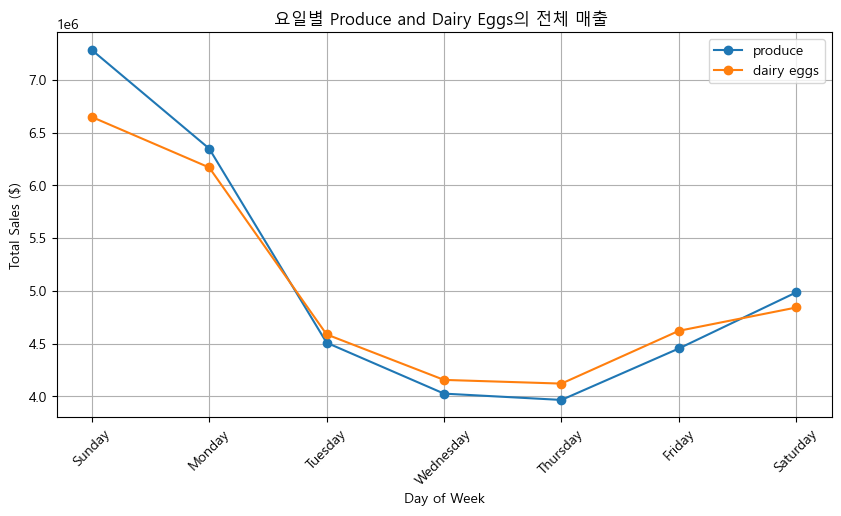

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# 요일별 produce와 dairy eggs의 매출액 합산
department_sales = df[df['department'].isin(['produce', 'dairy eggs'])].groupby(['order_dow', 'department'])['aisle_price'].sum().reset_index()

# 요일 이름 매핑
day_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
department_sales['order_dow'] = department_sales['order_dow'].map(day_mapping)

# 시각화
plt.figure(figsize=(10, 5))
for department in ['produce', 'dairy eggs']:
    subset = department_sales[department_sales['department'] == department]
    plt.plot(subset['order_dow'], subset['aisle_price'], marker='o', label=department)

plt.xlabel('Day of Week')
plt.ylabel('Total Sales ($)')
plt.title('요일별 Produce and Dairy Eggs의 전체 매출 ')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

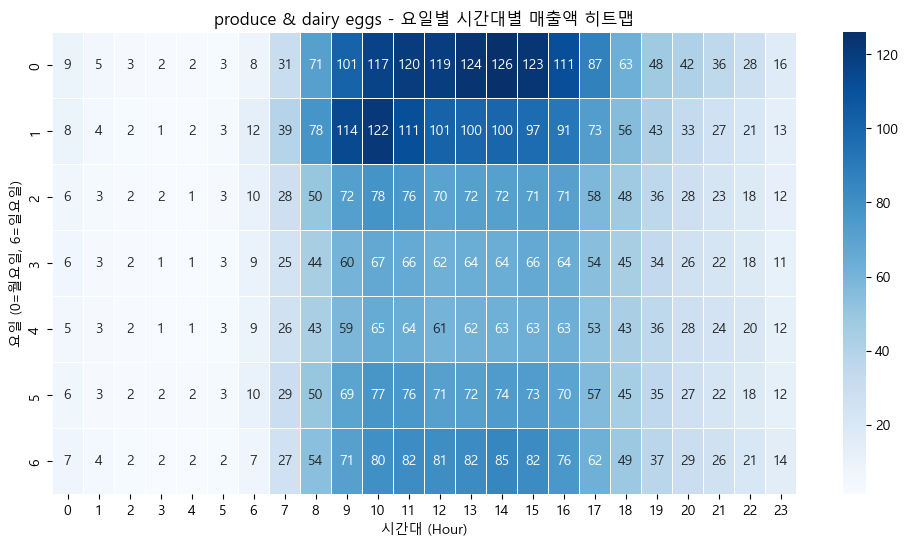

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# produce와 dairy eggs 카테고리만 필터링
filtered_df = df[df["department"].isin(["produce", "dairy eggs"])]

# 요일별, 시간별 매출액 집계
sales_heatmap = filtered_df.pivot_table(index="order_dow", columns="order_hour_of_day", values="aisle_price", aggfunc="sum")
sales_heatmap = sales_heatmap*0.0001
# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(sales_heatmap, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)

# 축 레이블 설정
plt.xlabel("시간대 (Hour)")
plt.ylabel("요일 (0=월요일, 6=일요일)")
plt.title("produce & dairy eggs - 요일별 시간대별 매출액 히트맵")
plt.show()

In [42]:
import pandas as pd

# 특정 카테고리 목록 정의
target_categories = monday_category_counts['department'].tolist()
# 특정 카테고리 제품만 필터링
filtered_data = df[df['department'].isin(target_categories)]

# 카테고리별 재구매율 계산
category_reorder_rates = filtered_data.groupby('department')['reordered'].mean().reset_index()

# 카테고리별 재구매율 정렬
category_reorder_rates = category_reorder_rates.sort_values(by='reordered', ascending=False)

# 결과 출력
print("🔹 특정 카테고리의 반복 구매율 🔹")
print(category_reorder_rates)

🔹 특정 카테고리의 반복 구매율 🔹
         department  reordered
7        dairy eggs   0.669969
3         beverages   0.653460
17          produce   0.649913
2            bakery   0.628141
8              deli   0.607719
16             pets   0.601285
1            babies   0.578971
5              bulk   0.577040
18           snacks   0.574180
0           alcohol   0.569924
13     meat seafood   0.567674
4         breakfast   0.560922
10           frozen   0.541885
9   dry goods pasta   0.461076
6      canned goods   0.457405
11        household   0.402178
12    international   0.369229
14           pantry   0.346721
15    personal care   0.321129


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'dairy eggs'),
  Text(1, 0, 'beverages'),
  Text(2, 0, 'produce'),
  Text(3, 0, 'bakery'),
  Text(4, 0, 'deli'),
  Text(5, 0, 'pets'),
  Text(6, 0, 'babies'),
  Text(7, 0, 'bulk'),
  Text(8, 0, 'snacks'),
  Text(9, 0, 'alcohol'),
  Text(10, 0, 'meat seafood'),
  Text(11, 0, 'breakfast'),
  Text(12, 0, 'frozen'),
  Text(13, 0, 'dry goods pasta'),
  Text(14, 0, 'canned goods'),
  Text(15, 0, 'household'),
  Text(16, 0, 'international'),
  Text(17, 0, 'pantry'),
  Text(18, 0, 'personal care')])

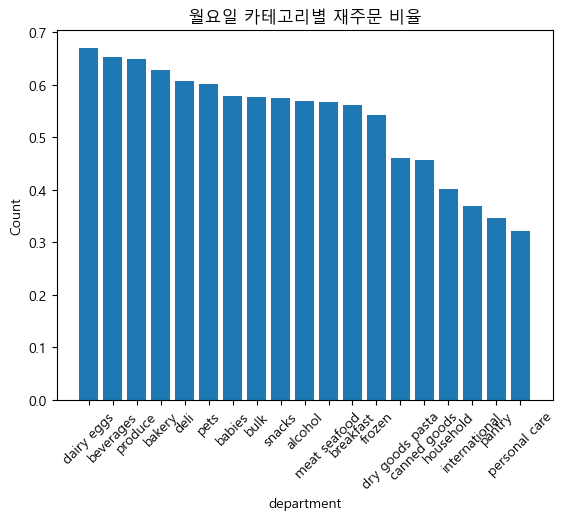

In [43]:
plt.bar(x=category_reorder_rates['department'], height =category_reorder_rates['reordered'])
plt.title('월요일 카테고리별 재주문 비율')
plt.xlabel('department')
plt.ylabel('Count')
plt.xticks(rotation = 45)

In [44]:
# produce와 dairy eggs 제품만 필터링
filtered_df = df[df["department"].isin(["produce", "dairy eggs"])]

# department별 평균 구매 주기 계산
purchase_cycle_dept = filtered_df.groupby("department")["reordered"].mean().reset_index()
purchase_cycle_dept.columns = ["department", "avg_days_since_prior_order"]

# 결과 출력
print(purchase_cycle_dept.sort_values(by="avg_days_since_prior_order", ascending=True))

   department  avg_days_since_prior_order
1     produce                    0.649913
0  dairy eggs                    0.669969
